In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Reading in the Data

In [3]:
pass_arrived_data = \
pd.read_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/pass_attempt_training_tensor.csv")

In [4]:
pass_arrived_data.head(20)

group      gameId  playId  defense_nflId  offense_nflId  playId3  playId2  \
0   test  2018090600     889          79848            310       13        1   
1   test  2018090600     889          79848        2507828       13        1   
2   test  2018090600     889          79848        2543583       13        1   
3   test  2018090600     889          79848        2559033       13        1   
4   test  2018090600     889          79848        2560854       13        1   
5   test  2018090600     889              0              0       13        1   
6   test  2018090600     889              0              0       13        1   
7   test  2018090600     889              0              0       13        1   
8   test  2018090600     889              0              0       13        1   
9   test  2018090600     889              0              0       13        1   
10  test  2018090600     889        2534832            310       13        1   
11  test  2018090600     889        2534832        2507828       13        1   
12  test  2018090600     889        2534832        2543583       13        1   
13  test  2018090600     889        2534832        2559033       13        1   
14  test  2018090600     889        2534832        2560854       13        1   
15  test  2018090600     889              0              0       13        1   
16  test  2018090600     889              0              0       13        1   
17  test  2018090600     889              0              0       13        1   
18  test  2018090600     889              0              0       13        1   
19  test  2018090600     889              0              0       13        1   

    defenseId  offenseId  defense_s_x  ...  receiver_s_x  receiver_s_y  \
0           1          1     1.202585  ...      2.930058     -6.697078   
1           1          2     1.202585  ...      2.930058     -6.697078   
2           1          3     1.202585  ...      2.930058     -6.697078   
3           1          4     1.202585  ...      2.930058     -6.697078   
4           1          5     1.202585  ...      2.930058     -6.697078   
5           1          6     0.000000  ...      0.000000      0.000000   
6           1          7     0.000000  ...      0.000000      0.000000   
7           1          8     0.000000  ...      0.000000      0.000000   
8           1          9     0.000000  ...      0.000000      0.000000   
9           1         10     0.000000  ...      0.000000      0.000000   
10          2          1    -1.273327  ...      2.930058     -6.697078   
11          2          2    -1.273327  ...      2.930058     -6.697078   
12          2          3    -1.273327  ...      2.930058     -6.697078   
13          2          4    -1.273327  ...      2.930058     -6.697078   
14          2          5    -1.273327  ...      2.930058     -6.697078   
15          2          6     0.000000  ...      0.000000      0.000000   
16          2          7     0.000000  ...      0.000000      0.000000   
17          2          8     0.000000  ...      0.000000      0.000000   
18          2          9     0.000000  ...      0.000000      0.000000   
19          2         10     0.000000  ...      0.000000      0.000000   

    receiver_distance_from_los  defense_football_x  defense_football_y  \
0                        10.13               10.33               -5.42   
1                        10.13               10.33               -5.42   
2                        10.13               10.33               -5.42   
3                        10.13               10.33               -5.42   
4                        10.13               10.33               -5.42   
5                         0.00                0.00                0.00   
6                         0.00                0.00                0.00   
7                         0.00                0.00                0.00   
8                         0.00                0.00                0.00   
9                         0

In [5]:
pass_arrived_data.shape

(3638580, 29)

In [6]:
pass_arrived_data2= pass_arrived_data.drop_duplicates(subset=['gameId', 'playId', 'defenseId'], keep='first')
pass_arrived_data2 = pass_arrived_data2.drop(['offense_nflId','offenseId','defense_offense_x',\
                                              'defense_offense_y', 'defense_offense_s_x', 'defense_offense_s_y'],
                                            axis = 1)

In [7]:
pass_arrived_data2[pass_arrived_data2["group"] == "training"].head(20)

group      gameId  playId  defense_nflId  playId3  playId2  \
545600  training  2018090600     146          79848        2        1   
545610  training  2018090600     146        2534832        2        1   
545620  training  2018090600     146        2552315        2        1   
545630  training  2018090600     146        2552689        2        1   
545640  training  2018090600     146        2555383        2        1   
545650  training  2018090600     146        2556363        2        1   
545660  training  2018090600     146        2557958        2        1   
545670  training  2018090600     146              0        2        1   
545680  training  2018090600     146              0        2        1   
545690  training  2018090600     146              0        2        1   
545700  training  2018090600     146              0        2        1   
545710  training  2018090600     168          79848        3        2   
545720  training  2018090600     168        2534832        3        2   
545730  training  2018090600     168        2552315        3        2   
545740  training  2018090600     168        2552689        3        2   
545750  training  2018090600     168        2555383        3        2   
545760  training  2018090600     168        2556363        3        2   
545770  training  2018090600     168        2557958        3        2   
545780  training  2018090600     168              0        3        2   
545790  training  2018090600     168              0        3        2   

        defenseId  defense_s_x  defense_s_y  defense_receiver_x  ...  \
545600          1     1.521425    -5.139539               -0.67  ...   
545610          2    -0.675504    -2.334222               12.97  ...   
545620          3     0.637937    -3.563346                1.26  ...   
545630          4     2.722142     1.028612                7.41  ...   
545640          5    -2.893247     2.004874                4.23  ...   
545650          6     3.015874    -0.909397                1.68  ...   
545660          7     0.794390    -1.213031               -0.63  ...   
545670          8     0.000000     0.000000                0.00  ...   
545680          9     0.000000     0.000000                0.00  ...   
545690         10     0.000000     0.000000                0.00  ...   
545700         11     0.000000     0.000000                0.00  ...   
545710          1     3.063773    -1.650362                9.15  ...   
545720          2    -0.766231     3.537978               19.65  ...   
545730          3     1.308629     0.903100                4.62  ...   
545740          4     1.860657    -0.786355               14.14  ...   
545750          5     1.185599     0.763188               12.01  ...   
545760          6    -0.443296    -1.898944                4.09  ...   
545770          7    -0.659768     4.087090                5.24  ...   
545780          8     0.000000     0.000000                0.00  ...   
545790          9     0.000000     0.000000                0.00  ...   

        receiver_s_x  receiver_s_y  receiver_distance_from_los  \
545600      2.514221      0.700564                        3.49   
545610      2.514221      0.700564                        3.49   
545620      2.514221      0.700564                        3.49   
545630      2.514221      0.700564                        3.49   
545640      2.514221      0.700564                        3.49   
545650      2.514221      0.700564                        3.49   
545660      2.514221      0.700564                        3.49   
545670      0.000000      0.000000                        0.00   
545680      0.000000      0.000000                        0.00   
545690      0.000000      0.000000                        0.00   
545700      0.000000      0.000000                        0.00   
545710      1.345177      4.378002                       -2.83   
545720      1.345177      4.378002                       -2.83   
545730      1.345177      4.378002      

In [8]:
target_data = pd.read_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/pass_attempt_training_target.csv")

In [9]:
target_data.head(10)

group      gameId  playId  playId2  playId3 passResult  passResultDisc
0  test  2018090600     889        1       13          I               1
1  test  2018090600    1061        2       17          C               2
2  test  2018090600    1295        3       20          I               1
3  test  2018090600    1628        4       25          I               1
4  test  2018090600    1680        5       26          C               2
5  test  2018090600    1801        6       29          I               1
6  test  2018090600    1869        7       30          C               2
7  test  2018090600    1940        8       33          I               1
8  test  2018090600    2116        9       36          C               2
9  test  2018090600    2360       10       38          I               1

# Formatting the Data

In [10]:
pass_arrived_data2.columns

Index(['group', 'gameId', 'playId', 'defense_nflId', 'playId3', 'playId2',
       'defenseId', 'defense_s_x', 'defense_s_y', 'defense_receiver_x',
       'defense_receiver_y', 'defense_receiver_s_x', 'defense_receiver_s_y',
       'receiver_s_x', 'receiver_s_y', 'receiver_distance_from_los',
       'defense_football_x', 'defense_football_y', 'receiver_football_x',
       'receiver_football_y', 'football_s',
       'receiver_football_defender_dist_diff',
       'defender_receiver_football_dist_diff'],
      dtype='object')

In [11]:
def create_x(data, nfeatures):
    # creating a numpy tensor to hold the play data
    np_mat = np.array(data.drop(['group', 'gameId', 'playId', 'playId3','defense_nflId'],
                               axis = 1))
    
    # setting parameters
    ngames = np.max(np.array(data['playId2']))
    nDef = 11
    
    # initializing the tensor
    np_tensor = np.zeros((ngames, nDef, nfeatures))
    
    for row in range(len(np_mat)):
        np_tensor[int(np_mat[row][0]) - 1][int(np_mat[row][1]) - 1] = np_mat[row][2:]
    
    np_tensor = np_tensor.astype('float32')
    
    return(np_tensor)

In [12]:
X_train = create_x(data = pass_arrived_data2[pass_arrived_data2["group"] == "training"],
                  nfeatures = 16)

In [13]:
X_train.shape

(23154, 11, 16)

In [14]:
X_train[0][0]

array([  1.5214252,  -5.1395392,  -0.67     ,  -4.19     ,  -0.9927962,
        -5.8401036,   2.5142214,   0.7005644,   3.49     ,   8.43     ,
       -11.42     ,   9.1      ,  -7.23     ,   2.05     ,   7.3792872,
         2.571894 ], dtype=float32)

In [15]:
X_validation = create_x(data = pass_arrived_data2[(pass_arrived_data2["group"] == "validation")&(pass_arrived_data2["gameId"] < 20000000000)],
                  nfeatures = 16)

In [16]:
X_validation.shape

(2482, 11, 16)

In [17]:
X_validation[0][0]

array([  3.6585023 ,  -4.146837  ,  -4.13      ,   6.58      ,
         0.90948343,  -2.6925352 ,   2.749019  ,  -1.4543022 ,
         9.31      ,  12.08      , -11.36      ,  16.21      ,
       -17.94      ,   2.05      ,  16.409924  ,  -7.596262  ],
      dtype=float32)

In [18]:
X_test = create_x(data = pass_arrived_data2[(pass_arrived_data2["group"] == "test")&(pass_arrived_data2["gameId"] < 20000000000)],
                  nfeatures = 16)

In [19]:
X_test.shape

(2480, 11, 16)

In [20]:
X_test[0][0]

array([  1.2025849,  -2.9870036,  -6.64     , -13.31     ,  -1.7274736,
         3.710075 ,   2.9300585,  -6.697078 ,  10.13     ,  10.33     ,
        -5.42     ,  16.97     ,   7.89     ,   0.92     ,   3.8401828,
        -7.0489526], dtype=float32)

In [21]:
def create_y(data):
    targets = np.array(data["passResultDisc"])
    
    y = np.zeros((targets.shape[0], 3))
    for idx, target in enumerate(list(targets)):
        y[idx][0 + target] = 1
    
    return(y)

In [22]:
y_train = create_y(data = target_data[(target_data["group"] == "training")])

In [23]:
y_train.shape

(23154, 3)

In [24]:
y_train[0]

array([0., 1., 0.])

In [25]:
np.mean(y_train, axis = 0)

array([0.02306297, 0.31847629, 0.65846074])

In [26]:
y_validation = create_y(data = target_data[(target_data["group"] == "validation")&(target_data["gameId"] < 20000000000)])

In [27]:
y_validation.shape

(2482, 3)

In [28]:
y_test = create_y(data = target_data[(target_data["group"] == "test") & (target_data["gameId"] < 20000000000)])

In [29]:
y_test.shape

(2480, 3)

In [31]:
np.mean(y_test, axis = 0)

array([0.0266129 , 0.29959677, 0.67379032])

In [32]:
y_test[0]

array([0., 1., 0.])

# Training a Convolutional Neural Network Model

In [33]:
model = tf.keras.Sequential()

In [34]:
import tensorflow.keras.backend as K

# second convolutional neural network
# model.add(layers.BatchNormalization())
model.add(layers.Conv1D(100, 
                        kernel_size=1, 
                        strides=1,
                        input_shape = (11,16)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(150, 
                        kernel_size=1, 
                        strides=1))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(100, 
                        kernel_size=1, 
                        strides=1))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
# model.add(layers.AvgPool2D(pool_size=(11, 1)))

def channelPool(x):
    return .75*K.max(x,axis=1) + .25*K.mean(x,axis=1)

model.add(layers.Lambda(channelPool))

In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(50))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 100)           1700      
_________________________________________________________________
activation (Activation)      (None, 11, 100)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 100)           400       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 150)           15150     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 150)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 150)           600       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 100)           1

In [37]:
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint

In [38]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=['categorical_crossentropy'], metrics=['categorical_accuracy'], optimizer='adam')

In [39]:
history = model.fit(X_train, y_train,
                   validation_data = (X_validation, y_validation),
                   # batch_size = 64,
                   epochs = 20,
                   verbose = 1)

Epoch 1/20
724/724 [==============================] - 5s 7ms/step - loss: 0.8201 - categorical_accuracy: 0.6315 - val_loss: 0.6698 - val_categorical_accuracy: 0.6970
Epoch 2/20
724/724 [==============================] - 5s 7ms/step - loss: 0.6687 - categorical_accuracy: 0.6883 - val_loss: 0.6505 - val_categorical_accuracy: 0.7023
Epoch 3/20
724/724 [==============================] - 5s 7ms/step - loss: 0.6518 - categorical_accuracy: 0.6993 - val_loss: 0.6533 - val_categorical_accuracy: 0.7039
Epoch 4/20
724/724 [==============================] - 5s 7ms/step - loss: 0.6425 - categorical_accuracy: 0.7042 - val_loss: 0.6397 - val_categorical_accuracy: 0.7151
Epoch 5/20
724/724 [==============================] - ETA: 0s - loss: 0.6342 - categorical_accuracy: 0.71 - 5s 7ms/step - loss: 0.6342 - categorical_accuracy: 0.7125 - val_loss: 0.6397 - val_categorical_accuracy: 0.7075
Epoch 6/20
724/724 [==============================] - 5s 7ms/step - loss: 0.6298 - categorical_accuracy: 0.7179 - va

In [40]:
model.evaluate(X_test, y_test)

78/78 [==============================] - 0s 3ms/step - loss: 0.6014 - categorical_accuracy: 0.7290


[0.6013546586036682, 0.7290322780609131]

# Examining Results

The plays analyzed are part of the holdout set, so the CNN model did not ever see the data in training, or indirectly through optimizing the crps of the cross-validation set.

### Completed Pass #1

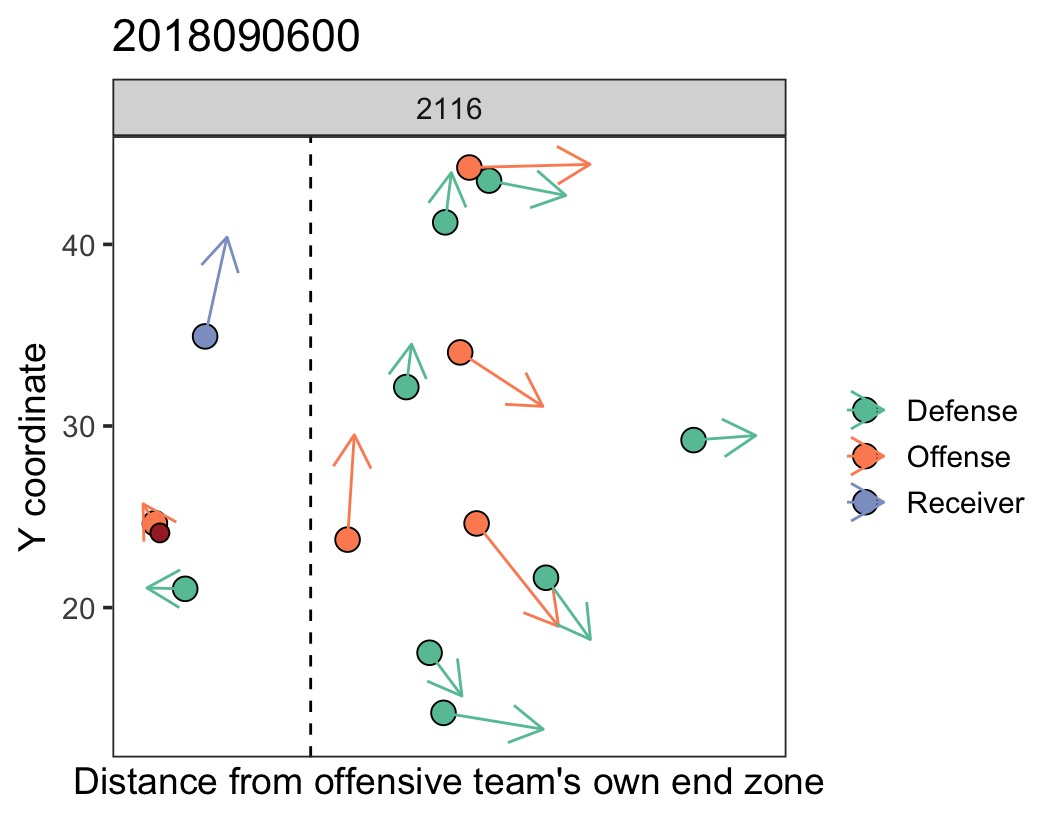

In [41]:
pass_arrived_data[(pass_arrived_data["gameId"] == 2018090600) & (pass_arrived_data["playId"] == 2116)]["playId2"].iloc[0]

9

In [42]:
yards = target_data[(target_data["gameId"] == 2018090600) & (target_data["playId"] == 2116)]["passResult"].iloc[0]
print("The actual result of the play was a " + str(yards))

The actual result of the play was a C


In [43]:
np.argmax(y_test[9-1])

2

In [44]:
# yardage prediction
model.predict(X_test)[8]

array([0.00156692, 0.08511054, 0.9133225 ], dtype=float32)

### Completed Pass #2

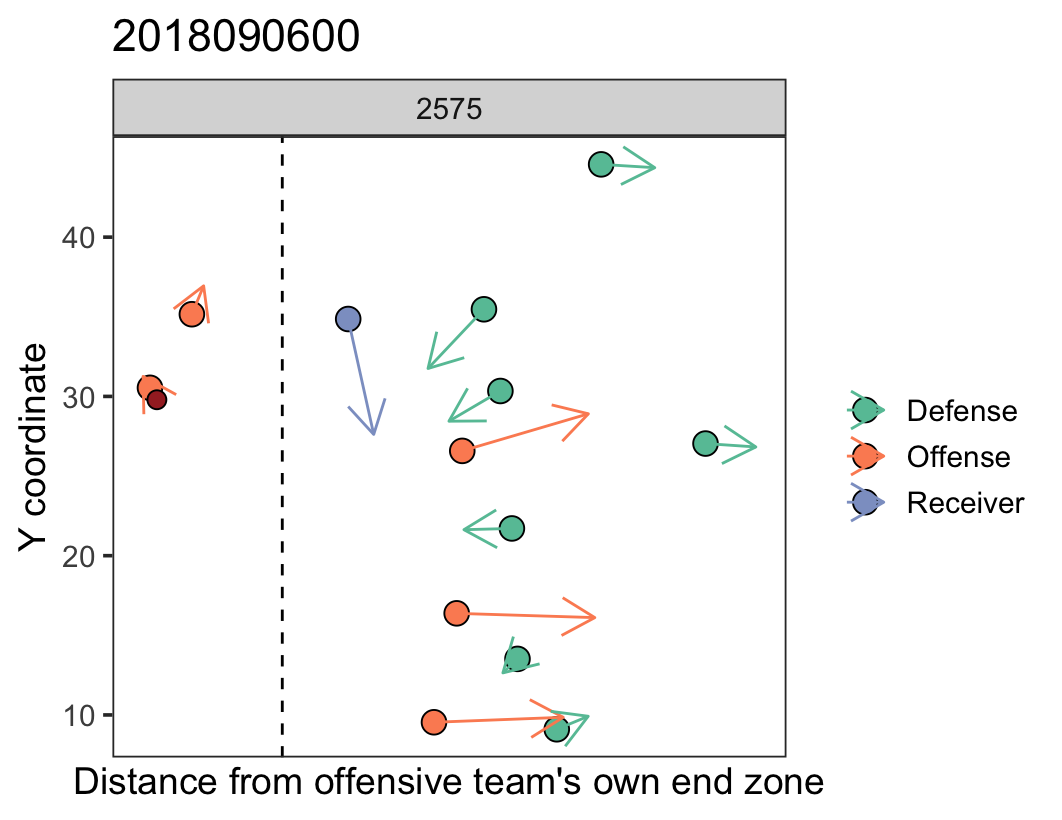

In [45]:
pass_arrived_data[(pass_arrived_data["gameId"] == 2018090600) & (pass_arrived_data["playId"] == 2575)]["playId2"].iloc[0]

12

In [46]:
yards = target_data[(target_data["gameId"] == 2018090600) & (target_data["playId"] == 2575)]["passResult"].iloc[0]
print("The actual result of the play was a " + str(yards))

The actual result of the play was a C


In [47]:
np.argmax(y_test[12-1])

2

In [48]:
# yardage prediction
model.predict(X_test)[11]

array([0.0019892, 0.1444846, 0.8535262], dtype=float32)

### Completed Pass #3

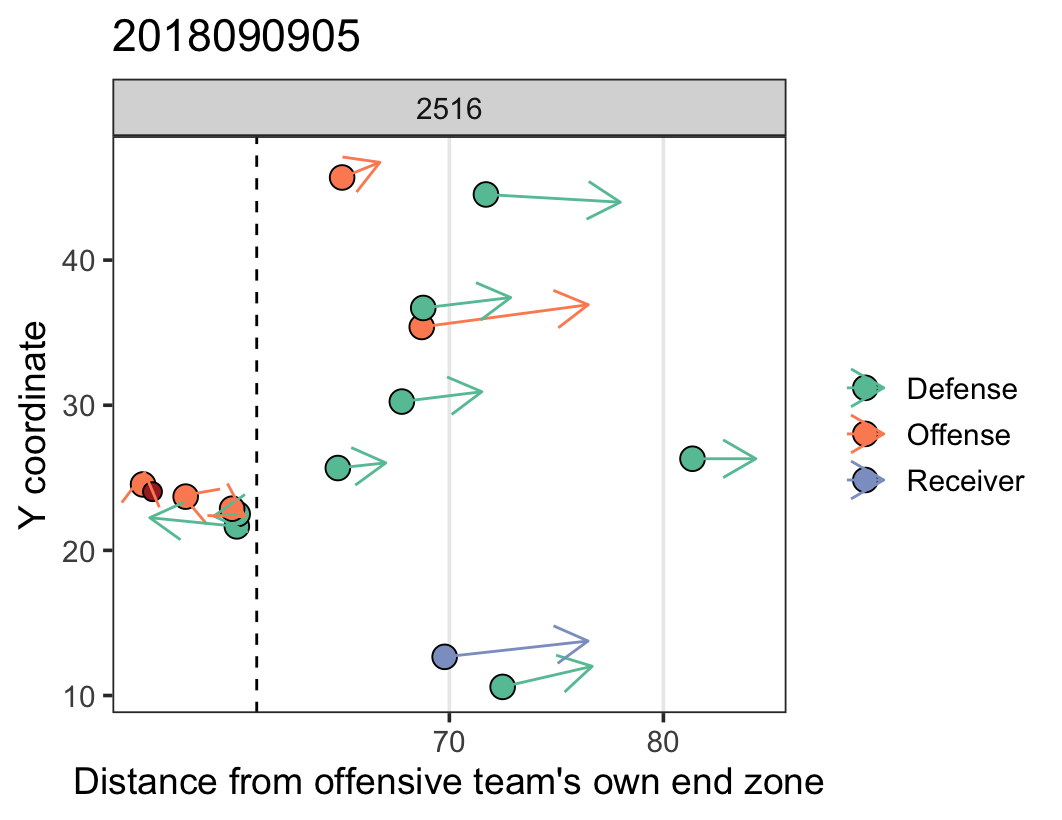

In [49]:
pass_arrived_data[(pass_arrived_data["gameId"] == 2018090905) & (pass_arrived_data["playId"] == 2516)]["playId2"].iloc[0]

84

In [50]:
yards = target_data[(target_data["gameId"] == 2018090905) & (target_data["playId"] == 2516)]["passResult"].iloc[0]
print("The actual result of the play was a " + str(yards))

The actual result of the play was a C


In [51]:
np.argmax(y_test[84-1])

2

In [52]:
# yardage prediction
model.predict(X_test)[83]

array([0.05526482, 0.4890236 , 0.4557116 ], dtype=float32)

### Incomplete Pass #1

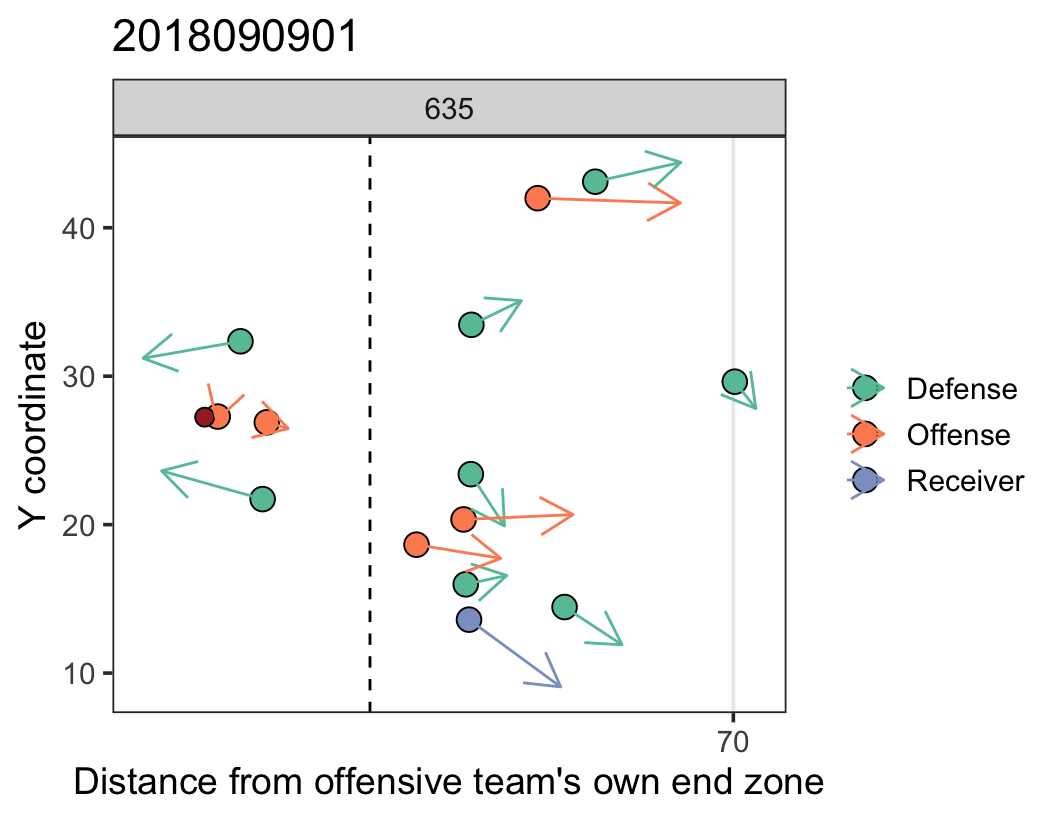

In [53]:
pass_arrived_data[(pass_arrived_data["gameId"] == 2018090901) & (pass_arrived_data["playId"] == 635)]["playId2"].iloc[0]

27

In [54]:
yards = target_data[(target_data["gameId"] == 2018090901) & (target_data["playId"] == 635)]["passResult"].iloc[0]
print("The actual result of the play was a " + str(yards))

The actual result of the play was a I


In [55]:
np.argmax(y_test[27-1])

1

In [56]:
# yardage prediction
model.predict(X_test)[26]

array([0.00477534, 0.21427102, 0.78095365], dtype=float32)

### Incomplete Pass #2

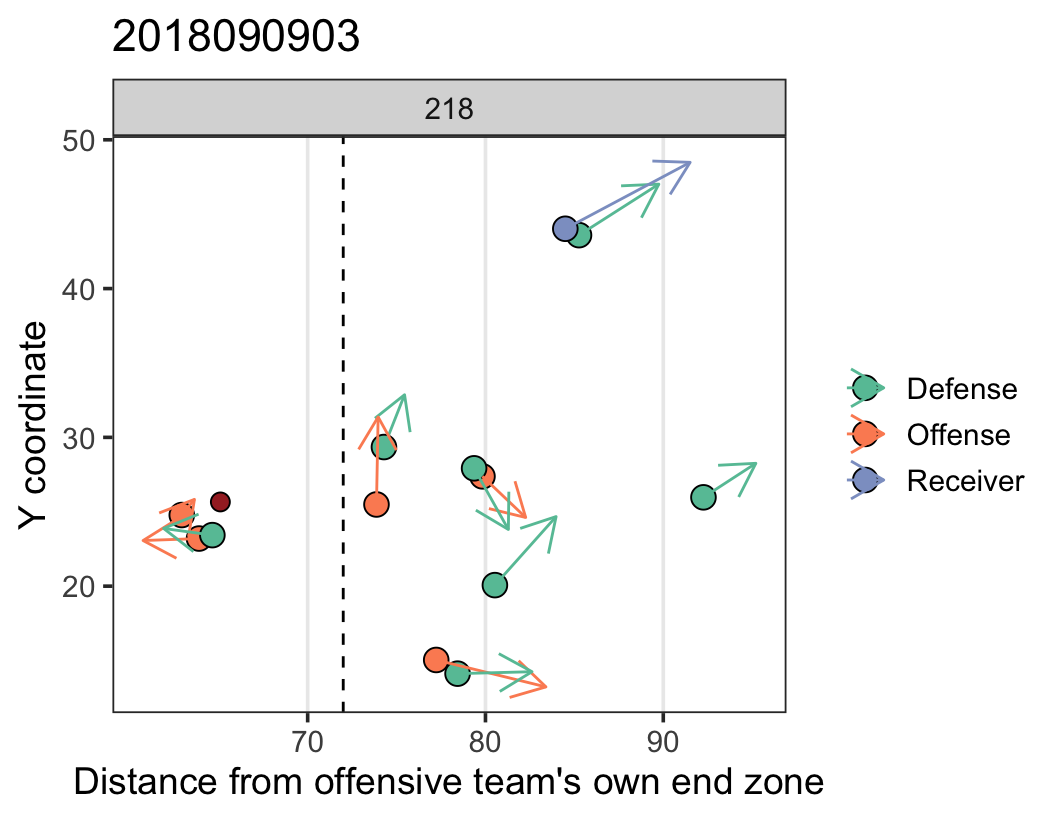

In [57]:
pass_arrived_data[(pass_arrived_data["gameId"] == 2018090903) & (pass_arrived_data["playId"] == 218)]["playId2"].iloc[0]

55

In [58]:
yards = target_data[(target_data["gameId"] == 2018090903) & (target_data["playId"] == 218)]["passResult"].iloc[0]
print("The actual result of the play was a " + str(yards))

The actual result of the play was a I


In [59]:
np.argmax(y_test[55-1])

1

In [60]:
# yardage prediction
model.predict(X_test)[54]

array([0.04058989, 0.8319936 , 0.12741654], dtype=float32)

### Intercepted Pass #1

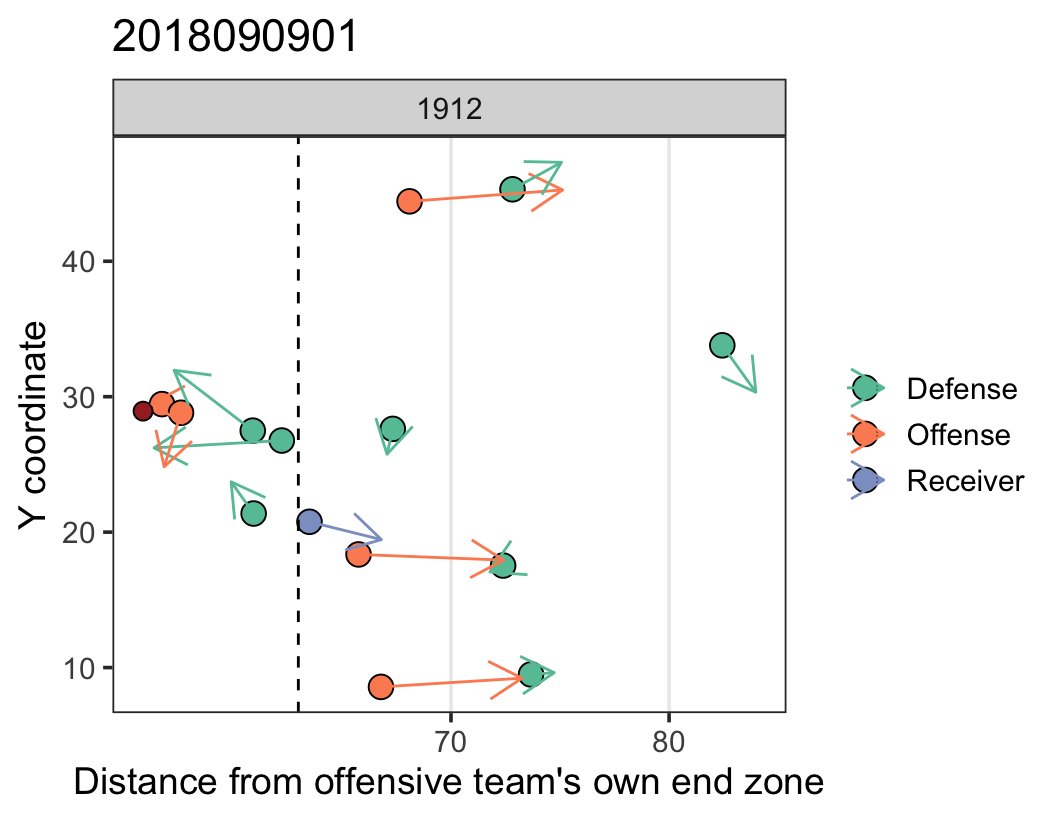

In [61]:
pass_arrived_data[(pass_arrived_data["gameId"] == 2018090901) & (pass_arrived_data["playId"] == 1912)]["playId2"].iloc[0]

30

In [62]:
yards = target_data[(target_data["gameId"] == 2018090901) & (target_data["playId"] == 1912)]["passResult"].iloc[0]
print("The actual result of the play was a " + str(yards))

The actual result of the play was a IN


In [63]:
np.argmax(y_test[30-1])

0

In [64]:
# yardage prediction
model.predict(X_test)[29]

array([0.00640825, 0.16913877, 0.824453  ], dtype=float32)

### Intercepted Pass #2

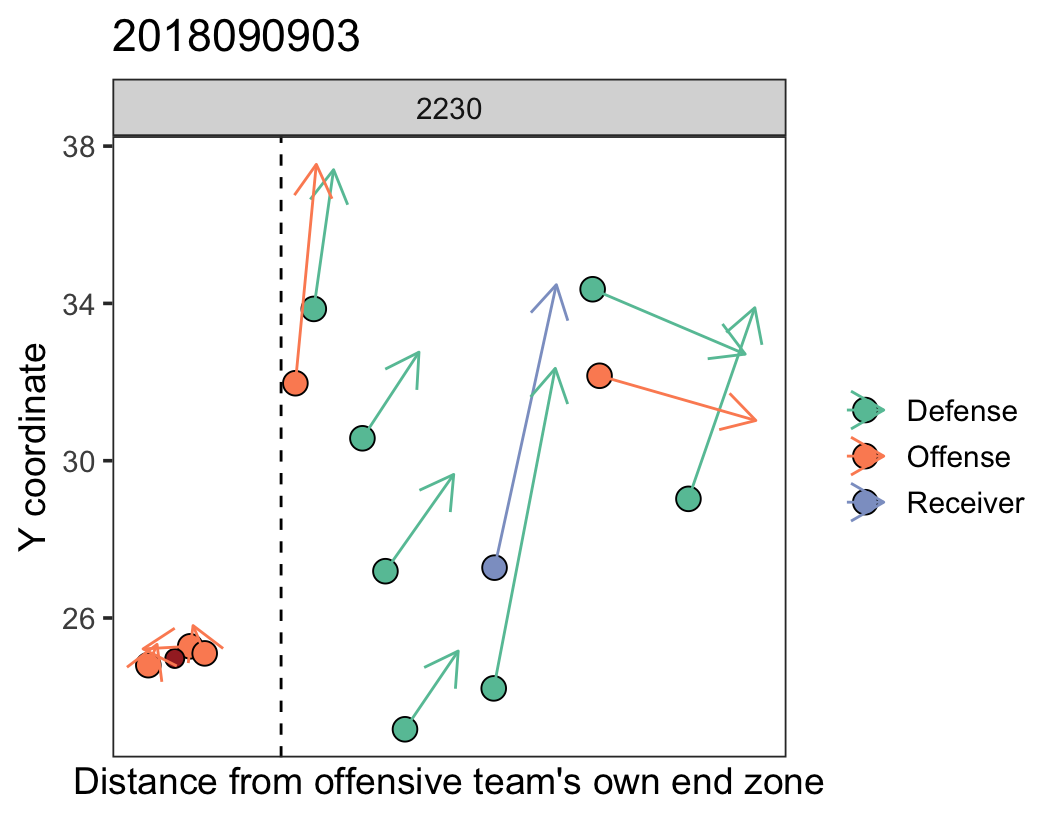

In [65]:
pass_arrived_data[(pass_arrived_data["gameId"] == 2018090903) & (pass_arrived_data["playId"] == 2230)]["playId2"].iloc[0]

61

In [66]:
yards = target_data[(target_data["gameId"] == 2018090903) & (target_data["playId"] == 2230)]["passResult"].iloc[0]
print("The actual result of the play was a " + str(yards))

The actual result of the play was a IN


In [67]:
np.argmax(y_test[61-1])

0

In [68]:
# yardage prediction
model.predict(X_test)[60]

array([0.10116155, 0.6371124 , 0.26172614], dtype=float32)

# Scoring Entire Data Set

In [69]:
pass_arrived_score = pd.read_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/pass_attempt_score_tensor.csv")

In [70]:
pass_arrived_score.head(20)

group      gameId  playId  defense_nflId  offense_nflId  playId2  \
0   full  2018090600      75          79848            310        1   
1   full  2018090600      75          79848        2533040        1   
2   full  2018090600      75          79848        2543583        1   
3   full  2018090600      75          79848        2555415        1   
4   full  2018090600      75          79848        2559033        1   
5   full  2018090600      75              0              0        1   
6   full  2018090600      75              0              0        1   
7   full  2018090600      75              0              0        1   
8   full  2018090600      75              0              0        1   
9   full  2018090600      75              0              0        1   
10  full  2018090600      75        2495613            310        1   
11  full  2018090600      75        2495613        2533040        1   
12  full  2018090600      75        2495613        2543583        1   
13  full  2018090600      75        2495613        2555415        1   
14  full  2018090600      75        2495613        2559033        1   
15  full  2018090600      75              0              0        1   
16  full  2018090600      75              0              0        1   
17  full  2018090600      75              0              0        1   
18  full  2018090600      75              0              0        1   
19  full  2018090600      75              0              0        1   

    defenseId  offenseId  defense_s_x  defense_s_y  ...  receiver_s_x  \
0           1          1     3.658502    -4.146837  ...      2.749019   
1           1          2     3.658502    -4.146837  ...      2.749019   
2           1          3     3.658502    -4.146837  ...      2.749019   
3           1          4     3.658502    -4.146837  ...      2.749019   
4           1          5     3.658502    -4.146837  ...      2.749019   
5           1          6     0.000000     0.000000  ...      0.000000   
6           1          7     0.000000     0.000000  ...      0.000000   
7           1          8     0.000000     0.000000  ...      0.000000   
8           1          9     0.000000     0.000000  ...      0.000000   
9           1         10     0.000000     0.000000  ...      0.000000   
10          2          1     2.076452     2.842313  ...      2.749019   
11          2          2     2.076452     2.842313  ...      2.749019   
12          2          3     2.076452     2.842313  ...      2.749019   
13          2          4     2.076452     2.842313  ...      2.749019   
14          2          5     2.076452     2.842313  ...      2.749019   
15          2          6     0.000000     0.000000  ...      0.000000   
16          2          7     0.000000     0.000000  ...      0.000000   
17          2          8     0.000000     0.000000  ...      0.000000   
18          2          9     0.000000     0.000000  ...      0.000000   
19          2         10     0.000000     0.000000  ...      0.000000   

    receiver_s_y  receiver_distance_from_los  defense_football_x  \
0      -1.454302                        9.31               12.08   
1      -1.454302                        9.31               12.08   
2      -1.454302                        9.31               12.08   
3      -1.454302                        9.31               12.08   
4      -1.454302                        9.31               12.08   
5       0.000000                        0.00                0.00   
6       0.000000                        0.00                0.00   
7       0.000000                        0.00                0.00   
8       0.000000                        0.00                0.00   
9       0.000000                        0.00                0.00   
10     -1.454302                        9.31               10.88   
11     -1.454302                        9.31               10.88   
12     -1.454302                        9.31               10.88   
13     -1.454302         

In [71]:
pass_arrived_score.shape

(1894090, 28)

In [72]:
pass_arrived_score2= pass_arrived_score.drop_duplicates(subset=['gameId', 'playId', 'defenseId'], keep='first')
pass_arrived_score2 = pass_arrived_score2.drop(['offense_nflId','offenseId','defense_offense_x',\
                                              'defense_offense_y', 'defense_offense_s_x', 'defense_offense_s_y'],
                                            axis = 1)

In [73]:
pass_arrived_score2.head(20)

group      gameId  playId  defense_nflId  playId2  defenseId  defense_s_x  \
0    full  2018090600      75          79848        1          1     3.658502   
10   full  2018090600      75        2495613        1          2     2.076452   
20   full  2018090600      75        2534832        1          3     2.036085   
30   full  2018090600      75        2552315        1          4     2.817672   
40   full  2018090600      75        2552689        1          5     2.942282   
50   full  2018090600      75        2555383        1          6     4.640175   
60   full  2018090600      75        2558175        1          7     3.411657   
70   full  2018090600      75              0        1          8     0.000000   
80   full  2018090600      75              0        1          9     0.000000   
90   full  2018090600      75              0        1         10     0.000000   
100  full  2018090600      75              0        1         11     0.000000   
110  full  2018090600     146          79848        2          1     1.521425   
120  full  2018090600     146        2534832        2          2    -0.675504   
130  full  2018090600     146        2552315        2          3     0.637937   
140  full  2018090600     146        2552689        2          4     2.722142   
150  full  2018090600     146        2555383        2          5    -2.893247   
160  full  2018090600     146        2556363        2          6     3.015874   
170  full  2018090600     146        2557958        2          7     0.794390   
180  full  2018090600     146              0        2          8     0.000000   
190  full  2018090600     146              0        2          9     0.000000   

     defense_s_y  defense_receiver_x  defense_receiver_y  ...  receiver_s_x  \
0      -4.146837               -4.13                6.58  ...      2.749019   
10      2.842313               -5.33               26.27  ...      2.749019   
20     -2.106955               11.06               14.10  ...      2.749019   
30     -2.474515               -5.41               11.38  ...      2.749019   
40      0.532051                1.18               24.91  ...      2.749019   
50     -0.609243                4.16               -0.02  ...      2.749019   
60     -2.237632               -2.37               18.93  ...      2.749019   
70      0.000000                0.00                0.00  ...      0.000000   
80      0.000000                0.00                0.00  ...      0.000000   
90      0.000000                0.00                0.00  ...      0.000000   
100     0.000000                0.00                0.00  ...      0.000000   
110    -5.139539               -0.67               -4.19  ...      2.514221   
120    -2.334222               12.97                6.68  ...      2.514221   
130    -3.563346                1.26                4.16  ...      2.514221   
140     1.028612                7.41               26.55  ...      2.514221   
150     2.004874                4.23               -2.02  ...      2.514221   
160    -0.909397                1.68               10.38  ...      2.514221   
170    -1.213031               -0.63               11.62  ...      2.514221   
180     0.000000                0.00                0.00  ...      0.000000   
190     0.000000                0.00                0.00  ...      0.000000   

     receiver_s_y  receiver_distance_from_los  defense_football_x  \
0       -1.454302                        9.31               12.08   
10      -1.454302                        9.31               10.88   
20      -1.454302                        9.31               27.27   
30      -1.454302                        9.31               10.80   
40      -1.454302                        9.31               17.39   
50      -1.454302                        9.31               20.37   
60      -1.454302                        9.31               13.84   
70       0.000000                        0.00                0.00   
80       0.000000    

In [74]:
pass_arrived_score2.shape

(189409, 22)

# Formatting the Data

In [75]:
pass_arrived_score2.columns

Index(['group', 'gameId', 'playId', 'defense_nflId', 'playId2', 'defenseId',
       'defense_s_x', 'defense_s_y', 'defense_receiver_x',
       'defense_receiver_y', 'defense_receiver_s_x', 'defense_receiver_s_y',
       'receiver_s_x', 'receiver_s_y', 'receiver_distance_from_los',
       'defense_football_x', 'defense_football_y', 'receiver_football_x',
       'receiver_football_y', 'football_s',
       'receiver_football_defender_dist_diff',
       'defender_receiver_football_dist_diff'],
      dtype='object')

In [76]:
def create_x(data, nfeatures):
    # creating a numpy tensor to hold the play data
    np_mat = np.array(data.drop(['group', 'gameId', 'playId','defense_nflId'],
                               axis = 1))
    
    # setting parameters
    ngames = np.max(np.array(data['playId2']))
    nDef = 11
    
    # initializing the tensor
    np_tensor = np.zeros((ngames, nDef, nfeatures))
    
    for row in range(len(np_mat)):
        np_tensor[int(np_mat[row][0]) - 1][int(np_mat[row][1]) - 1] = np_mat[row][2:]
    
    np_tensor = np_tensor.astype('float32')
    
    return(np_tensor)

In [77]:
X_score = create_x(data = pass_arrived_score2,
                  nfeatures = 16)

In [78]:
X_score.shape

(17219, 11, 16)

In [79]:
X_score[0][0]

array([  3.6585023 ,  -4.146837  ,  -4.13      ,   6.58      ,
         0.90948343,  -2.6925352 ,   2.749019  ,  -1.4543022 ,
         9.31      ,  12.08      , -11.36      ,  16.21      ,
       -17.94      ,   2.05      ,  16.409924  ,  -7.596262  ],
      dtype=float32)

# Saving Predictions

In [80]:
score_preds = model.predict(X_score)

In [81]:
score_preds.shape

(17219, 3)

In [82]:
score_preds[2]

array([0.00097903, 0.24133246, 0.7576885 ], dtype=float32)

In [83]:
np.mean(score_preds[:,2])

0.6685542

In [84]:
full_preds_df = pd.DataFrame(score_preds, columns = ['IN_prob', 'I_prob', 'C_prob'])

In [85]:
full_preds_df.shape

(17219, 3)

In [86]:
pass_arrived_score[["gameId", "playId"]].drop_duplicates().reset_index()

index      gameId  playId
0            0  2018090600      75
1          110  2018090600     146
2          220  2018090600     168
3          330  2018090600     190
4          440  2018090600     256
...        ...         ...     ...
17214  1893540  2018123015    3794
17215  1893650  2018123015    3819
17216  1893760  2018123015    3969
17217  1893870  2018123015    4057
17218  1893980  2018123015    4104

[17219 rows x 3 columns]

In [87]:
full_preds_df2 = pd.concat([pass_arrived_score[["gameId", "playId"]].drop_duplicates().reset_index(), full_preds_df], axis = 1)
full_preds_df2 = full_preds_df2[full_preds_df2["gameId"] < 10000000000]

In [88]:
full_preds_df2.shape

(17219, 6)

In [89]:
full_preds_df2 = full_preds_df2.drop(['index'], axis = 1)
full_preds_df2

gameId  playId   IN_prob    I_prob    C_prob
0      2018090600      75  0.005418  0.139932  0.854650
1      2018090600     146  0.026720  0.358199  0.615082
2      2018090600     168  0.000979  0.241332  0.757689
3      2018090600     190  0.018462  0.262755  0.718783
4      2018090600     256  0.001637  0.121097  0.877266
...           ...     ...       ...       ...       ...
17214  2018123015    3794  0.062507  0.544636  0.392857
17215  2018123015    3819  0.014769  0.150384  0.834847
17216  2018123015    3969  0.111752  0.486080  0.402168
17217  2018123015    4057  0.001039  0.106602  0.892359
17218  2018123015    4104  0.010744  0.329422  0.659834

[17219 rows x 5 columns]

In [90]:
full_preds_df.iloc[1000]

IN_prob    0.003412
I_prob     0.174576
C_prob     0.822013
Name: 1000, dtype: float32

In [93]:
full_preds_df2.iloc[1000]

gameId     2.018091e+09
playId     3.351000e+03
IN_prob    3.411741e-03
I_prob     1.745757e-01
C_prob     8.220126e-01
Name: 1000, dtype: float64

In [92]:
full_preds_df2.to_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/pass_attempt_classification_probs.csv", 
                        index = False)

In [95]:
# saving model
model.save('pass_attempt_classification_model')

INFO:tensorflow:Assets written to: pass_attempt_classification_model/assets


In [2]:
from tensorflow.keras.models import load_model

In [3]:
model2 = load_model('pass_attempt_classification_model')

In [102]:
score_preds = model2.predict(X_score)

In [103]:
score_preds.shape

(17219, 3)

In [82]:
score_preds[2]

array([0.00097903, 0.24133246, 0.7576885 ], dtype=float32)

In [104]:
score_preds[2]

array([0.00097903, 0.24133246, 0.7576885 ], dtype=float32)

![TrackingBad](/Users/James/Desktop/CoverageNet/src/08_writeup/images/TrackingBadEx.png "TrackingBad")

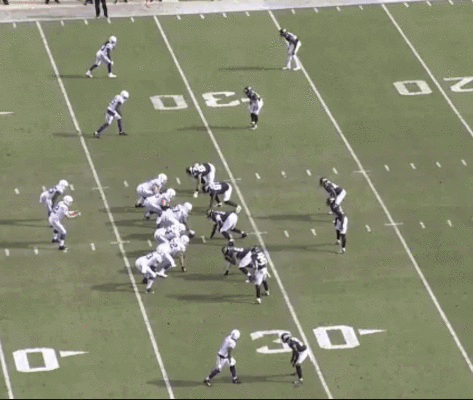

![/Users/James/Desktop/CoverageNet/src/08_writeup/images/TrackingBadEx.png](attachment:/Users/James/Desktop/CoverageNet/src/08_writeup/images/TrackingBadEx.png)

![ChessUrl](http://localhost:17506/session/preview.gif "chess")